In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
import mds
import xarray as xr
import xmitgcm
import seaborn as sns
import cmocean
import sys
import os
from IPython import display
import time

In [3]:
plt.rcParams.update({'font.size': 16
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 16,
      'legend.fontsize' : 14,'legend.handlelength': 3})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
plt.rcParams.update({'figure.figsize' : (14,6)})


In [9]:
dirold = '/central/groups/oceanphysics/anirban/NA/inputfiles/NA_2160/NA_2160/input_ll1815/'

fSs = open(dirold+'OBSs_1815x100x26.bin', 'rb')
Ss = np.fromfile(fSs, '>f4')
Ss.shape = (26,100,1815)
Ssmasked = np.ma.masked_where(Ss==0, Ss)

In [46]:

fNs = open(dirold+'OBNs_1815x100x26.bin', 'rb')
Ns = np.fromfile(fNs, '>f4')
Ns.shape = (26,100,1815)
Nsmasked = np.ma.masked_where(Ns==0, Ns)

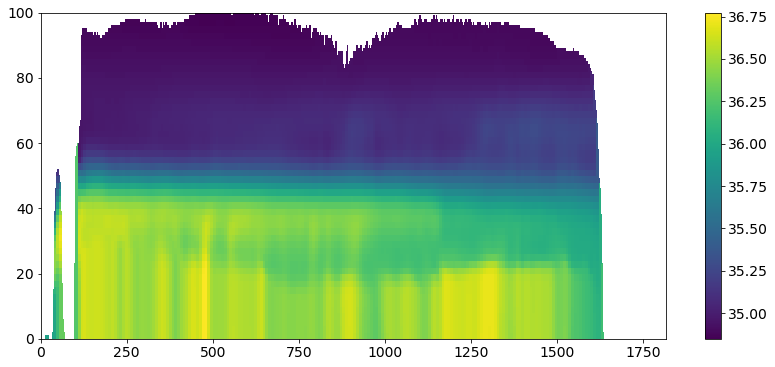

In [12]:
plt.pcolormesh(Ssmasked[-1]);
plt.colorbar()

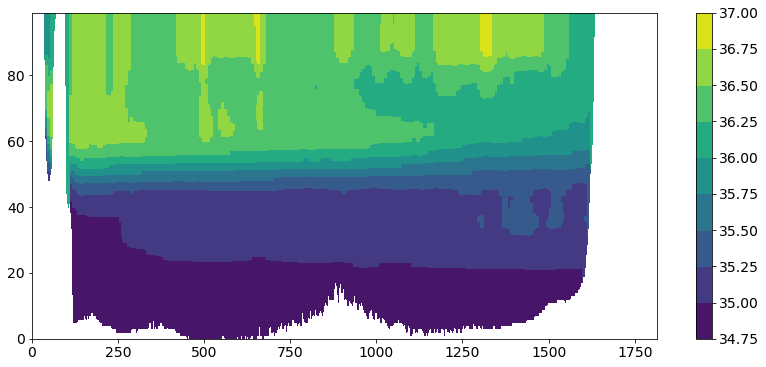

In [51]:
plt.contourf(np.flipud(Ssmasked[24]));
plt.colorbar()

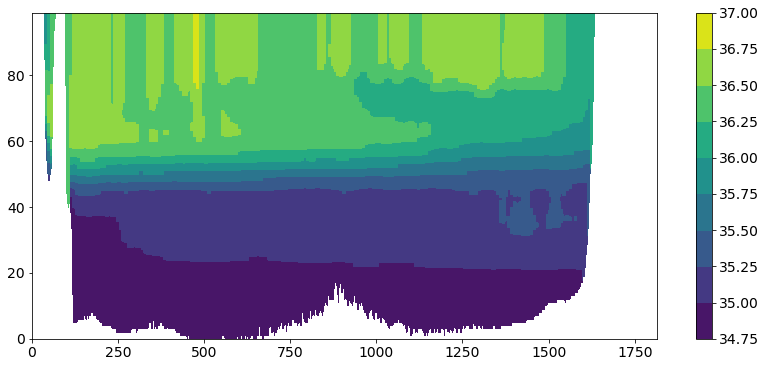

In [49]:
plt.contourf(np.flipud(Ssmasked[25]));
plt.colorbar()

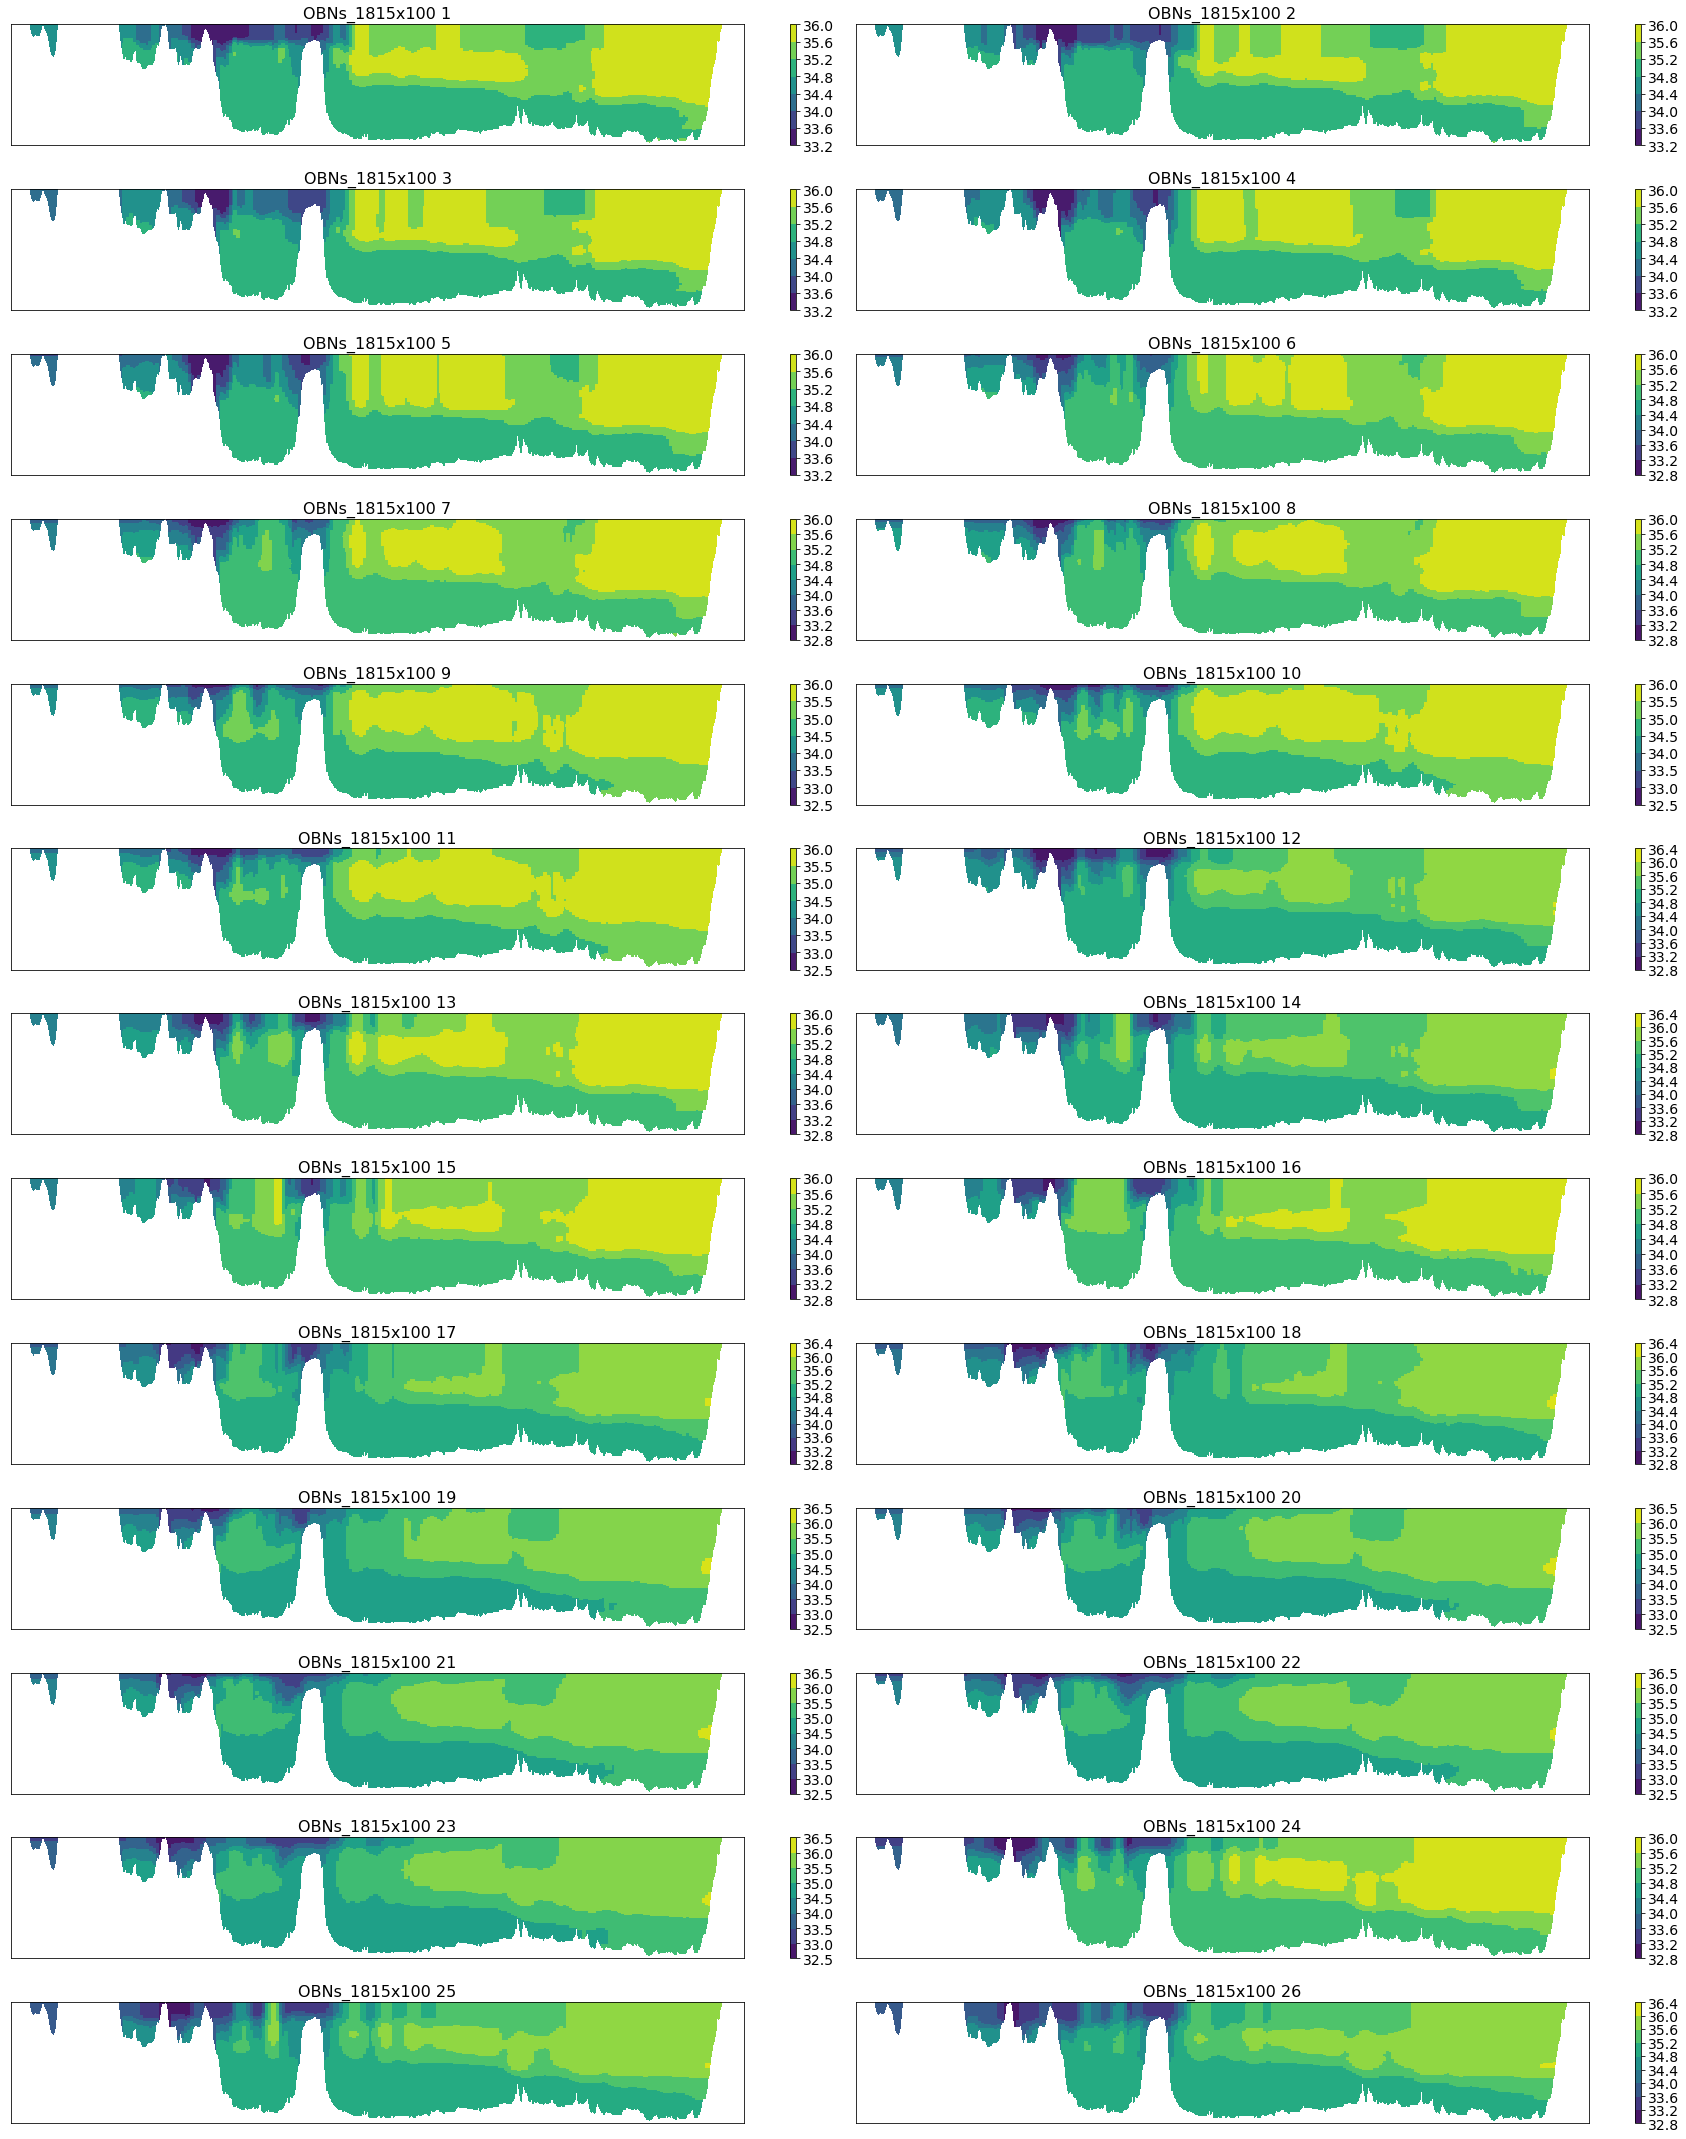

In [47]:
fig = plt.figure(figsize=(25,30))
for i in range(26):
    plt.subplot(13,2,i+1)
    plt.contourf(np.flipud(Nsmasked[i]));
    plt.title('OBNs_1815x100 %s'%(i+1))
    plt.yticks([])
    plt.xticks([])
    plt.colorbar()
    plt.tight_layout()

In [62]:
f = open(dirold+'bathy.bin', 'rb')
bathy = np.fromfile(f, '>f4')
bathy.shape = (532,1815)

<a list of 1 text.Text objects>

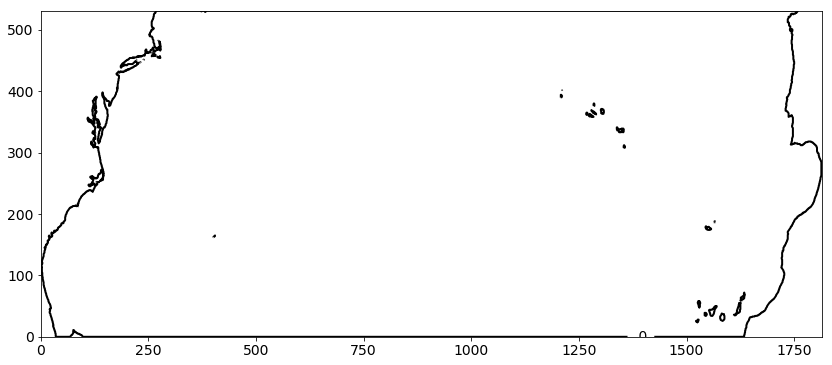

In [64]:
#plt.pcolormesh(bathy)
CS=plt.contour(bathy,levels = [-0.5,0.5], colors=('k',),linestyles=('-',),linewidths=(2,))
plt.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=14)


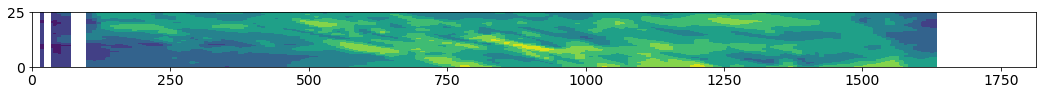

In [58]:
plt.figure(figsize=(18,1))
plt.contourf(Ssmasked[:,0,:])

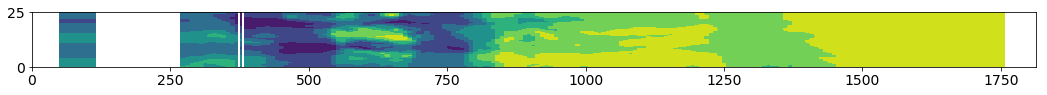

In [61]:
plt.figure(figsize=(18,1))
plt.contourf(Nsmasked[:,0,:])

In [59]:
Ssmasked[:,0,:].shape

(26, 1815)

In [65]:
a = np.linspace(0,39,40)
a

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39.])

In [80]:
a[::-1][0:20]

array([39., 38., 37., 36., 35., 34., 33., 32., 31., 30., 29., 28., 27.,
       26., 25., 24., 23., 22., 21., 20.])

In [81]:
BCS_surf[-26:].shape

(26, 1815)

In [86]:
BCS_surf = np.ma.zeros((532,1815))
BCS_surf[0:26] = Ssmasked[:,0,:]
BCS_surf[-26:] = Nsmasked[:,0,:]

Text(0.5,1,'OBC Salinity (surface) with sponges at N and S ')

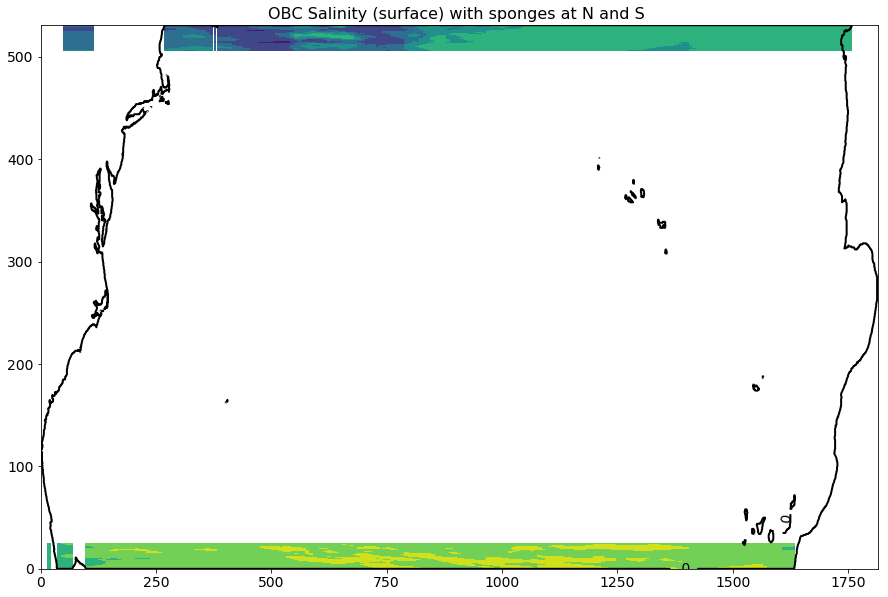

In [96]:
plt.figure(figsize=(15,10))
plt.contourf(BCS_surf)
CS=plt.contour(bathy,levels = [-0.5,0.5], colors=('k',),linestyles=('-',),linewidths=(2,))
plt.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=14)
plt.title('OBC Salinity (surface) with sponges at N and S ')

In [91]:
BCS_surf[26:-26].mask = True

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float64)

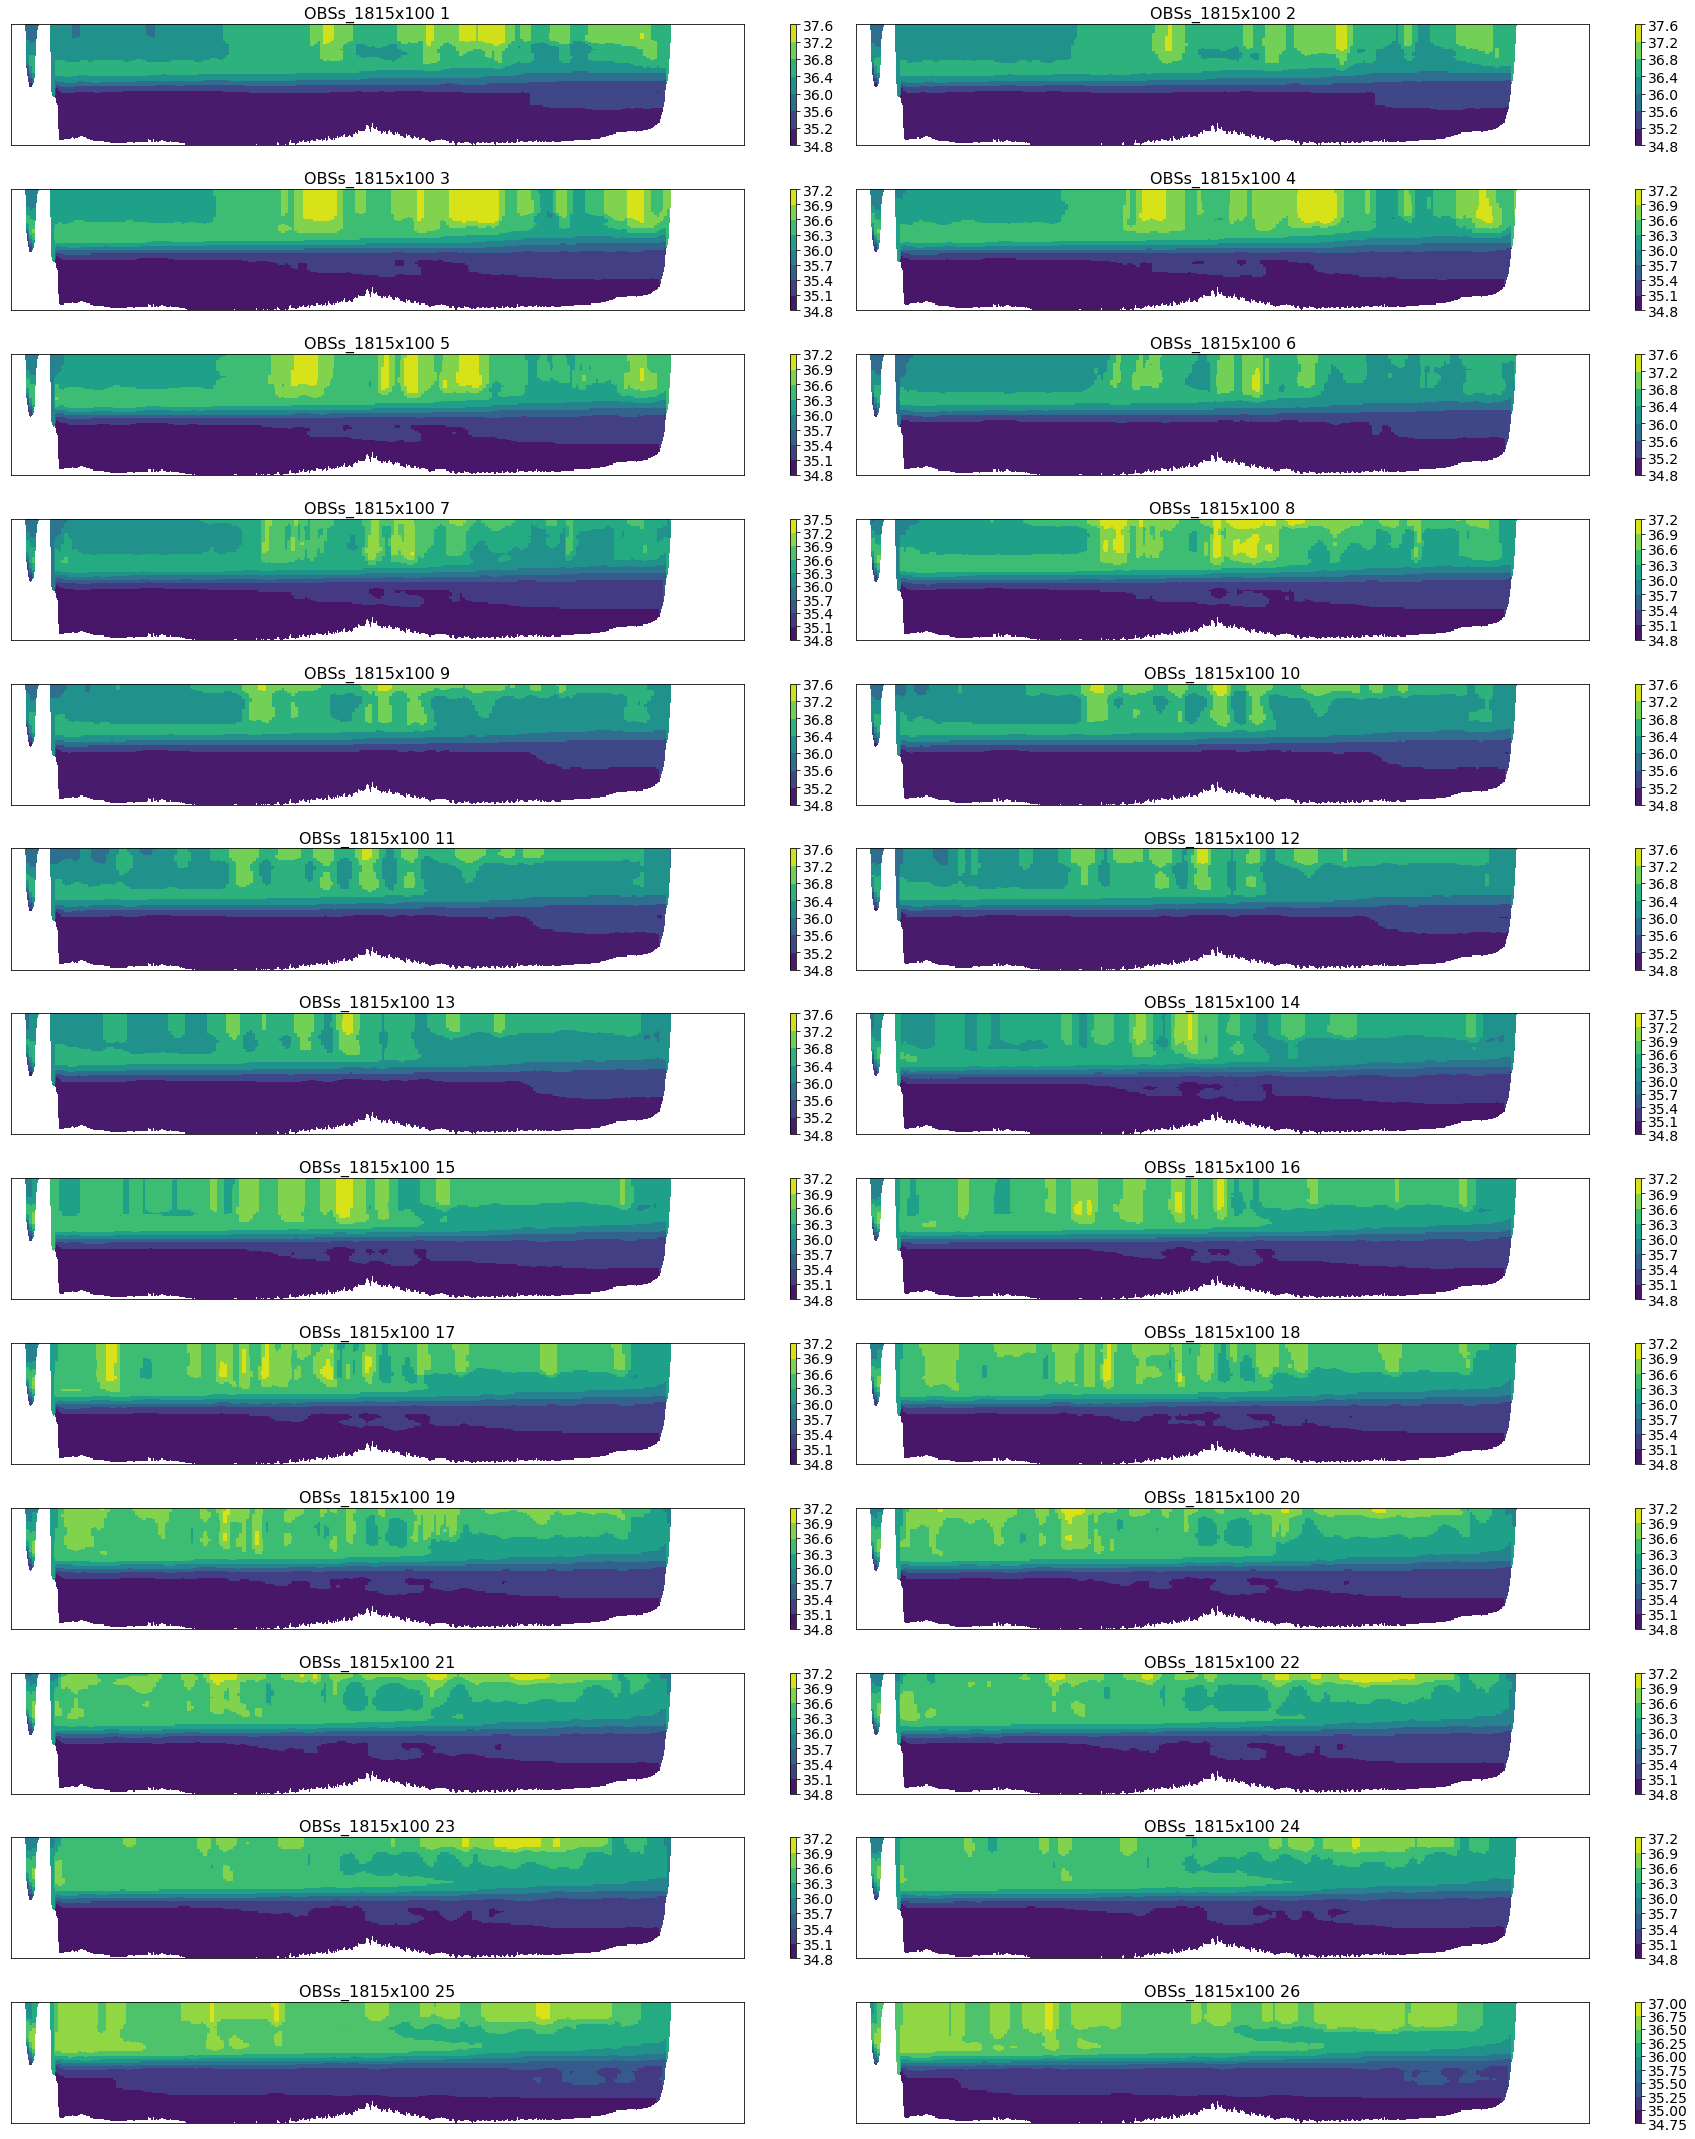

In [88]:
fig = plt.figure(figsize=(25,30))
for i in range(26):
    plt.subplot(13,2,i+1)
    plt.contourf(np.flipud(Ssmasked[i]));
    plt.title('OBSs_1815x100 %s'%(i+1))
    plt.yticks([])
    plt.xticks([])
    plt.colorbar()
    plt.tight_layout()

In [16]:
dirrun = '/central/groups/oceanphysics/anirban/NA/experiments/run_ll1815_03_tpxo8/'
RF = mds.rdmds(dirrun+'RF')

In [20]:
RF.shape = (101)

In [21]:
RF.shape

(101,)

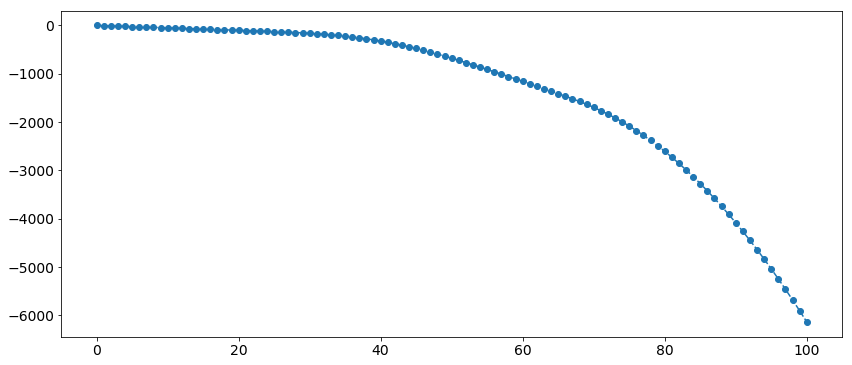

In [23]:
plt.plot(RF, 'o--')

In [108]:
683784


683784

In [98]:
4320-2232

2088

In [99]:
4320+2088

6408

In [100]:
8712-6552

2160

In [101]:
2160/24

90.0

In [102]:
2088/24

87.0

In [103]:
2232/24

93.0

In [104]:
87/29

3.0

In [109]:
(4*366+12*365)*24*3

420768

In [115]:
(5*366+13*365)*24*3

473400

In [110]:
(7*366+19*365)*24*3

683784

In [114]:
4/25*476

76.16